# Exploring Ski Resort Data from the Epic and Ikon Pass #
Grayson Hineline

### 1. Intro and Motivation

Growing up in the Pacific Northwest of North America, I had the pleasure of skiing at mountain resorts like Crystal and Steven’s pass in Washington state, Mt. Bachelor in Oregon, and Whistler-Blackcomb in British Columbia up in Canada. One peculiar thing happened when I was about 17: my favorite place to ski, Whistler-Blackcomb, was purchased by a company from Colorado called Vail Resorts. Next thing I know, buying a season pass at Whistler gave me access to not just that mountain, but mountains all over North America (and even some abroad). Since then, there’s been a trend in the skiing industry of massive ski resort companies buying individual privately owned resorts to add them to their armada of offerings on their season passes. Today, if you buy the Epic pass (offered by Vail Resorts) or the Ikon pass (offered by Alterra Mountain Company) you can ski all over North America without ever having to buy another lift ticket (and in Epic’s case you can even go to Europe and Australia). So that led me to a natural question… How do the ski resorts offered by the two mountains compare?

So, I set out to get some data to be able to compare the two passes on the aggregate. Surprisingly, while you can find data for ski resorts relatively easily to view online, there’s not really a website that had all the resorts for both passes organized such that I could gather all the data across all the resorts offered by the passes to compare them. In the end, I settled on just scraping OnTheSnow.com for data on the (most) of the resorts offered by both. Although I wanted to compare every single resort offered by both Epic and Ikon, OnTheSnow didn’t have data on all of them, and combining data from other websites wasn’t really an option because other places displayed the data so differently. So, I settled for the 46 Epic and 40 Ikon Resorts listed by OnTheSnow.

In [1]:
# Importing libraries
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization perameters
sns.set_theme()
colors = {'Epic':'royalblue', 'Ikon':'yellow'}

### 2. The Data
Scraping OnTheSnow in Python was just a matter of figuring out OnTheSnow’s HTML, and then applying some functions I created to gather the data from a list of URLs to spit out some tables containing all the data. If you’d like to check out the Python code I used for the scraping, you can find it [here](Onthesnow.com). After that, I had three tables in my ski resort data base:


`skiresorts`, which contains a bunch of general information about the ski resorts:

In [2]:
# loading and displaying csv file
skiresorts = pd.read_csv(r'C:\Users\grays\OneDrive\Documents\hinegra17 github repo\hinegra17\OnTheSnowProject\CSV files after scraping\skiresorts.csv')
display(skiresorts.head())
skiresorts.info()

,Location,Resort,Pass,Limited or unlimited,Total Lifts,Summit height,Vertical Drop,Base Elevation,Runs in Total,Longest Run,...,Projected Closing,Projected Days Open,Days Open Last Year,Years Open,Average Snowfall,Beginners Runs,Intermediate Runs,Advanced Runs,Expert Runs,Night Skiing
0,utah,Alta,Ikon,limited,6,11068',2538',8530',119,1.3 mi,...,April 25 20222022/04/25,142,156,84,"547""",NaN,NaN,NaN,NaN,NaN
1,colorado,Arapahoe Basin,Ikon,limited,9,13050',2530',10780',147,1.5 mi,...,June 05 20222022/06/05,270,234,76,"350""",7%,20%,49%,24%,NaN
2,colorado,Aspen Snowmass,Ikon,limited,40,12510',4406',8104',336,5.3 mi,...,April 17 20222022/04/17,148,150,75,"300""",NaN,NaN,NaN,NaN,NaN
3,california,Bear Mountain,Ikon,unlimited,12,8805',1665',7140',15,1.5 mi,...,April 16 20222022/04/16,135,122,79,"100""",20%,33%,33%,13%,NaN
4,montana,Big Sky,Ikon,limited,36,11166',4350',7500',317,6 mi,...,April 24 20222022/04/24,143,144,49,"400""",15%,25%,42%,18%,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Location              87 non-null     object
 1   Resort                87 non-null     object
 2   Pass                  87 non-null     object
 3   Limited or unlimited  87 non-null     object
 4   Total Lifts           87 non-null     int64 
 5   Summit height         87 non-null     object
 6   Vertical Drop         87 non-null     object
 7   Base Elevation        87 non-null     object
 8   Runs in Total         87 non-null     object
 9   Longest Run           79 non-null     object
 10  Skiable Terrain       87 non-null     object
 11  Snow Making           78 non-null     object
 12  Projected Opening     87 non-null     object
 13  Projected Closing     87 non-null     object
 14  Projected Days Open   87 non-null     object
 15  Days Open Last Year   87 non-null     obje

`annualsnow`, which includes yearly snowfall data since the 2012-2013 season:

In [3]:
# loading and displaying csv file
annualsnow = pd.read_csv(r'C:\Users\grays\OneDrive\Documents\hinegra17 github repo\hinegra17\OnTheSnowProject\CSV files after scraping\annualsnow.csv')
display(annualsnow.head())
annualsnow.info()

,Location,Resort,Pass,Year,Total Snowfall,Snowfall Days,Average Base Depth,Average Summit Depth,Max Base Depth,Biggest Snowfall
0,utah,Alta,Ikon,2012 - 2013,"366""",76,"50""","52""","113""","17"""
1,utah,Alta,Ikon,2013 - 2014,"353""",68,"64""","60""","124""","14"""
2,utah,Alta,Ikon,2014 - 2015,"278""",56,"44""","42""","90""","19"""
3,utah,Alta,Ikon,2015 - 2016,"286""",60,"51""","51""","116""","19"""
4,utah,Alta,Ikon,2016 - 2017,"304""",55,"64""","63""","145""","19"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Location              870 non-null    object
 1   Resort                870 non-null    object
 2   Pass                  870 non-null    object
 3   Year                  870 non-null    object
 4   Total Snowfall        870 non-null    object
 5   Snowfall Days         870 non-null    int64 
 6   Average Base Depth    870 non-null    object
 7   Average Summit Depth  870 non-null    object
 8   Max Base Depth        870 non-null    object
 9   Biggest Snowfall      870 non-null    object
dtypes: int64(1), object(9)
memory usage: 68.1+ KB


And finally, `currentseason`, which included monthly snowfall data for just the current 2021-2022 season:

In [4]:
# loading and displaying csv file
currentseason = pd.read_csv(r'C:\Users\grays\OneDrive\Documents\hinegra17 github repo\hinegra17\OnTheSnowProject\CSV files after scraping\currentseason.csv')
display(currentseason.head())
currentseason.info()

,Location,Resort,Pass,Month,Average Snowfall,Snowfall Days,Average Base Depth,Average Summit Depth,Max Base Depth,Biggest Snowfall
0,utah,Alta,Ikon,October,"11""",3.0,"16""","20""","20""","5"""
1,utah,Alta,Ikon,November,"82""",14.0,"45""","45""","65""","16"""
2,utah,Alta,Ikon,December,"76""",13.0,"69""","71""","87""","16"""
3,utah,Alta,Ikon,January,"73""",13.0,"92""","93""","107""","15"""
4,utah,Alta,Ikon,February,"61""",11.0,"106""","106""","118""","14"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Location              696 non-null    object 
 1   Resort                696 non-null    object 
 2   Pass                  696 non-null    object 
 3   Month                 696 non-null    object 
 4   Average Snowfall      636 non-null    object 
 5   Snowfall Days         636 non-null    float64
 6   Average Base Depth    636 non-null    object 
 7   Average Summit Depth  636 non-null    object 
 8   Max Base Depth        636 non-null    object 
 9   Biggest Snowfall      636 non-null    object 
dtypes: float64(1), object(9)
memory usage: 54.5+ KB


If you’d like to see all the tables more clearly, download them yourself, or if you would like to know the meaning of the data in any of the columns, feel free to check out the pre-cleaning versions I posted on Kaggle [here](https://www.kaggle.com/datasets/graysonhineline/epic-and-ikon-ski-resorts-data).

### 3. Preprocessing

With the data collected, it was now time to load it into SQL and clean it. To do so, I did all of the cleaning and much of the querying in Microsoft SQL Server. Below is the code I used the clean the data. In sum, my cleaning and preprocessing steps were to:
1.	I used some of the features in Microsoft SQL Server to manually change the names of the columns in all three .csv files to be easier to work with in code. For example, I changed the column `Average Snowfall` in currentseason to be `avg_snowfall`
2.	Converted all columns in `annualsnow` and `currentseason` to numerical and into inches.
3.	Since `skiresorts` needed so much cleaning, I created a new table in SQL called `skiresorts2` and inserted clean data into it from `skiresorts`.

Here is the code I used in SQL to do so:



In [5]:
"""
-- Converting all columns in annualsnow and current season to numerical and into inches
Update annualsnow
	Set
		total_snowfall = (
			Case When total_snowfall Like '%cm%' Then Cast(Replace(total_snowfall, 'cm', '') as int) * 0.393701
				 Else Cast(Replace(total_snowfall, '"', '') as int)
			End),
		avg_base_dep = (
			Case When avg_base_dep Like '%cm%' Then Cast(Replace(avg_base_dep, 'cm', '') as int) * 0.393701
				 Else Cast(Replace(avg_base_dep, '"', '') as int)
			End),
		avg_sum_dep = (
			Case When avg_sum_dep Like '%cm%' Then Cast(Replace(avg_sum_dep, 'cm', '') as int) * 0.393701
				 Else Cast(Replace(avg_sum_dep, '"', '') as int)
			End),
		max_base_dep = (
			Case When max_base_dep Like '%cm%' Then Cast(Replace(max_base_dep, 'cm', '') as int) * 0.393701
				 Else Cast(Replace(max_base_dep, '"', '') as int)
			End),
		biggest_snowfall = (
			Case When biggest_snowfall Like '%cm%' Then Cast(Replace(biggest_snowfall, 'cm', '') as int) * 0.393701
				 Else Cast(Replace(biggest_snowfall, '"', '') as int)
			End);

Alter Table annualsnow Alter Column total_snowfall float null;
Alter Table annualsnow Alter Column snowfall_days int null;
Alter Table annualsnow Alter Column avg_base_dep float null;
Alter Table annualsnow Alter Column avg_sum_dep float null;
Alter Table annualsnow Alter Column max_base_dep float null;
Alter Table annualsnow Alter Column biggest_snowfall float null;


Update currentseason
	Set
		avg_snowfall = (
			Case When avg_snowfall Like '%cm%' Then Cast(Replace(avg_snowfall, 'cm', '') as int) * 0.393701
				 Else Cast(Replace(avg_snowfall, '"', '') as int)
				 End),
		avg_base_dep = (
			Case When avg_base_dep Like '%cm%' Then Cast(Replace(avg_base_dep, 'cm', '') as int) * 0.393701
				 Else Cast(Replace(avg_base_dep, '"', '') as int)
				 End),
		avg_sum_dep = (
			Case When avg_sum_dep Like '%cm%' Then Cast(Replace(avg_sum_dep, 'cm', '') as int) * 0.393701
				 Else Cast(Replace(avg_sum_dep, '"', '') as int)
				 End),
		max_base_dep = (
			Case When max_base_dep Like '%cm%' Then Cast(Replace(max_base_dep, 'cm', '') as int) * 0.393701
				 Else Cast(Replace(max_base_dep, '"', '') as int)
				 End),
		biggest_snowfall = (
			Case When biggest_snowfall Like '%cm%' Then Cast(Replace(biggest_snowfall, 'cm', '') as int) * 0.393701
				 Else Cast(Replace(biggest_snowfall, '"', '') as int)
				 End);

Alter Table currentseason Alter Column avg_snowfall float null;
Alter Table currentseason Alter Column snowfall_days int null;
Alter Table currentseason Alter Column avg_base_dep float null;
Alter Table currentseason Alter Column avg_sum_dep float null;
Alter Table currentseason Alter Column max_base_dep float null;
Alter Table currentseason Alter Column biggest_snowfall float null;


-- Since skiresorts needed so much cleaning to make it function the way I wanted, I
-- just opted to make an entirely new table out of a cleaned select statement.
Select
	-- Creating column for continent
	Case when location = 'trentino' or location = 'northern-alps' or location = 'valais' then 'Europe'
		 Else 'North America'
		 End as continent,
	location as region,
	resort,
	Pass,
	limited_or_unlimited,
	cast(total_lifts as int) as total_lifts,
	-- Converting the following from meters to feet
	Case When sum_height Like '%m%' Then Cast(Replace(sum_height, 'm', '') as int) * 3.28084
		 Else Cast(Replace(sum_height, Char(39), '') as int)
		 End as sum_height,
	Case When vert_drop Like '%m%' Then Cast(Replace(vert_drop, 'm', '') as int) * 3.28084
		 Else Cast(Replace(vert_drop, Char(39), '') as int)
		 End as vert_drop,
	Case When base_elevation Like '%m%' Then Cast(Replace(base_elevation, 'm', '') as int) * 3.28084
		 Else Cast(Replace(base_elevation, Char(39), '') as int)
		 End as base_elevation,
	-- Some values are not the number of runs, but rather the total length of all runs, making these null
	Cast((Case When runs like '% %' Then NULL
			   Else runs
			   End) as int) as runs,
	-- Converting longest_run to miles
	Case When longest_run Like '% km%' Then Round(Cast(Replace(longest_run, ' km', '') as float) * 0.621371, 2)
		 Else Cast(Replace(longest_run, ' mi', '') as float)
		 End as longest_run,
	-- Converting resorts with terrain in acres to integers in their own column
	Case When terrain like '% ac%' Then Cast(Replace(terrain, ' ac', '') as int)
		 Else null
		 End as terrain_ac,
	-- Converting resorts with terrain in km to integers in their own column
	Case When terrain like '% km%' Then Cast(Replace(terrain, ' km', '') as float)
		 Else null
		 End as terrain_km,
	Case When snow_making like '% ac%' Then Cast(Replace(snow_making, ' ac', '') as int)
		 Else null
		 End as snow_making,
	Cast(SUBSTRING(proj_open, CHARINDEX(' ', proj_open)+ 9, 10) as Date) as proj_open,
	Cast(SUBSTRING(proj_close, CHARINDEX(' ', proj_close)+ 9, 10) as Date) as proj_close,
	Case When proj_days_open like '%N.A.%' then null
		 Else cast(proj_days_open as int)
		 End as proj_days_open,
	Case When days_open_2021 like '%N.A.%' then null
		 Else cast(days_open_2021 as int)
		 End as days_open_2021,
	Case When years_open like '%N.A.%' then null
		 Else cast(years_open as int)
		 End as years_open,
	Case When avg_snow like '%cm%' Then Cast(Replace(avg_snow, 'cm', '') as float) * 2.54
	     Else Cast(Replace(avg_snow, '"', '') as float)
		 End as avg_snow,
	Case When green_runs like '' Then null
		 Else Cast(Replace(green_runs, '%', '') as float) / 100
		 End as green_runs,
	Case When blue_runs like '' Then null
		 Else Cast(Replace(blue_runs, '%', '') as float) / 100
		 End as blue_runs,
	Case When black_runs like '' Then null
		 Else Cast(Replace(black_runs, '%', '') as float) / 100
		 End as black_runs,
	Case When double_blacks like '' Then null
		 Else Cast(Replace(double_blacks, '%', '') as float) / 100
		 End as double_blacks,
	Case When night_skiing = '' Then 'False'
		 Else 'True'
		 End as night_skiing
Into
	skiresorts2
From
	skiresorts;

""";

### 4. Data Exploration

Next, I ran many queries on the data. While I did most of these queries in SQL, I opted to use `pydoc` to transfer their outputs into Python here such that I could show both show the query and the outputs in a more visually appealing way (if you just want to look at my SQL code and my query outputs without all the other stuff in this python notebook, you can see them in [this folder](bdfsa)).

In [6]:
# Connecting to the SQL database on my desktop
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-SM7M7ND\SQLEXPRESS;'
                      'Database=master;'
                      'Trusted_Connection=yes;')

**What follows are the queries I ran on the database I created to explore the data:**

How many resorts are there for the Epic in Ikon passes in this data set? What about if we filter by continent?

In [7]:
# Displaying the number of Ikon and Epic resorts in the dataset
query = pd.read_sql_query('''
Select
	pass,
	count(resort)
From
	skiresorts2
Group by pass
''', conn)

display(query)

# Displaying the number of Ikon and Epic resorts in the dataset filtered by continent
query = pd.read_sql_query('''
Select
	continent,
	pass,
	count(resort)
From
	skiresorts2
Group by pass, continent
''', conn)

display(query)

,pass,
0,Epic,46
1,Ikon,41


,continent,pass,
0,Europe,Epic,20
1,North America,Epic,26
2,North America,Ikon,41


Looks like onthesnow.com is missing a bunch of resorts for both passes, given that Epic has 61 total resorts and Ikon has 57. So while this data may give some insights, the data not being entirely complete does not allow me to draw any big, definitive conclusions involving the total value of either pass.

Where are the different resorts located, and how many of those resorts are given by the Epic pass or the Ikon pass?

In [8]:
query = pd.read_sql_query('''
Select 
	continent,
	region,
	pass,
	Count(region) as num_of_resorts
from 
	skiresorts2
Group by region, continent, pass
Order by num_of_resorts desc;
''', conn)

display(query)

,continent,region,pass,num_of_resorts
0,Europe,northern-alps,Epic,8
1,Europe,trentino,Epic,8
2,North America,utah,Ikon,6
3,North America,colorado,Epic,6
4,North America,colorado,Ikon,6
5,North America,california,Ikon,5
6,North America,british-columbia,Epic,4
7,Europe,valais,Epic,4
8,North America,vermont,Ikon,3
9,North America,alberta,Ikon,3


I live in the Pacific Northwest of North America, so lets filter for resorts there:

In [9]:
query = pd.read_sql_query('''
select 
	region,
	pass,
	count(resort) as num_of_resorts
from skiresorts2
Where continent = 'North America'
	  and (region = 'british-columbia'
	  or region = 'washington'
	  or region = 'oregon')
group by region, pass
order by region, num_of_resorts;
''', conn)

display(query)

,region,pass,num_of_resorts
0,british-columbia,Ikon,2
1,british-columbia,Epic,4
2,oregon,Ikon,1
3,washington,Epic,1
4,washington,Ikon,2


What are the names of those resorts and what do their metrics look like?

In [10]:
query = pd.read_sql_query('''
select 
	*
from skiresorts2
Where continent = 'North America'
	  and (region = 'british-columbia'
	  or region = 'washington'
	  or region = 'oregon')
order by region;
''', conn)

display(query)

,continent,region,resort,Pass,limited_or_unlimited,total_lifts,sum_height,vert_drop,base_elevation,runs,...,proj_close,proj_days_open,days_open_2021,years_open,avg_snow,green_runs,blue_runs,black_runs,double_blacks,night_skiing
0,North America,british-columbia,Cypress Mountain,Ikon,limited,6,4751.0,2008.0,3012.0,61,...,2022-04-10,137,136.0,47,426.0,0.08,0.38,0.34,0.20,True
1,North America,british-columbia,Revelstoke,Ikon,limited,6,7300.0,5620.0,1680.0,59,...,2022-04-17,141,135.0,15,413.0,NaN,NaN,NaN,NaN,False
2,North America,british-columbia,Fernie,Epic,limited,10,7001.0,3550.0,3451.0,142,...,2022-04-10,135,130.0,60,444.0,NaN,NaN,NaN,NaN,False
3,North America,british-columbia,Kicking Horse,Epic,limited,5,8038.0,4134.0,3904.0,129,...,2022-04-10,128,120.0,22,288.0,NaN,NaN,NaN,NaN,False
4,North America,british-columbia,Kimberley,Epic,limited,5,6503.0,2464.0,4035.0,80,...,2022-04-10,137,109.0,64,150.0,NaN,NaN,NaN,NaN,True
5,North America,british-columbia,Whistler Blackcomb,Epic,unlimited,23,7493.0,5279.0,2215.0,234,...,2022-05-23,185,106.0,56,448.0,0.18,0.40,0.35,0.07,False
6,North America,oregon,Mt. Bachelor,Ikon,limited,15,9065.0,3365.0,5700.0,119,...,2022-05-22,177,185.0,64,462.0,0.19,0.55,0.22,0.03,False
7,North America,washington,Summit at Snoqualmie,Ikon,limited,20,3865.0,1025.0,2840.0,65,...,2022-04-24,140,120.0,85,428.0,0.15,0.40,0.45,NaN,True
8,North America,washington,Stevens Pass,Epic,unlimited,12,5845.0,1800.0,4061.0,53,...,2022-05-01,123,116.0,85,460.0,0.08,0.45,0.28,0.19,True
9,North America,washington,Crystal Mountain,Ikon,limited,11,7012.0,3100.0,4400.0,86,...,2022-05-08,142,NaN,60,486.0,0.08,0.31,0.32,0.29,False


Which ski resort had the snowfall for both the epic and Ikon pass...the last ten years?

In [11]:
query = pd.read_sql_query('''
Select 
	resort,
	location,
	pass,
	year,
	total_snowfall
From
	annualsnow
Where total_snowfall = (Select
							max(total_snowfall)
						From annualsnow
						Where pass = 'Epic')
	  or total_snowfall = (Select
							max(total_snowfall)
							From annualsnow
						Where pass = 'Ikon');
''', conn)

display(query)

,resort,location,pass,year,total_snowfall
0,Crystal Mountain,washington,Ikon,2012 - 2013,838.0
1,Northstar California,california,Epic,2016 - 2017,692.0


The current year so far? 

*This query was run and the data was collected in Spring of 2022*

In [12]:
query = pd.read_sql_query('''
Select 
	resort,
	location,
	pass,
	year,
	total_snowfall
From
	annualsnow
Where (total_snowfall = (Select
							max(total_snowfall)
						From annualsnow
						Where pass = 'Epic' and year = '2021 - To Date')
	  or total_snowfall = (Select
							max(total_snowfall)
							From annualsnow
						Where pass = 'Ikon' and year = '2021 - To Date'))
	 and year = '2021 - To Date';

''', conn)

display(query)

,resort,location,pass,year,total_snowfall
0,Crystal Mountain,washington,Ikon,2021 - To Date,317.0
1,Stevens Pass,washington,Epic,2021 - To Date,334.0


Which ski resort got the most snowfall in each month of the current season?

In [13]:
query = pd.read_sql_query('''
With maxSnowfall(month, max_avg_snowfall) As
	(Select
		month,
		max(avg_snowfall)
	From currentseason
	Group by month)

Select
	a.resort,
	a.month,
	a.avg_snowfall
From 
	currentseason a
		join
	maxSnowfall b on a.avg_snowfall = b.max_avg_snowfall and a.month = b.month
order by avg_snowfall
''', conn)

display(query)

,resort,month,avg_snowfall
0,Arapahoe Basin,May,1.0
1,Arapahoe Basin,April,32.0
2,Sunshine Village,October,40.0
3,Whistler Blackcomb,October,40.0
4,Snowbird,March,62.0
5,Palisades Tahoe,February,72.0
6,Jackson Hole,December,99.0
7,Crystal Mountain,November,111.0
8,Jackson Hole,January,112.0


What are the top 10 resorts with the highest average total snowfall?

In [14]:
query = pd.read_sql_query('''
Select top 10
	location,
	resort,
	pass,
	AVG(total_snowfall) as avg_total_snowfall
From annualsnow
Group by Resort, pass, Location
Order by avg_total_snowfall desc;
''', conn)

display(query)

,location,resort,pass,avg_total_snowfall
0,utah,Snowbird,Ikon,415.1
1,wyoming,Jackson Hole,Ikon,414.4
2,washington,Crystal Mountain,Ikon,404.7
3,oregon,Mt. Bachelor,Ikon,391.0
4,california,Palisades Tahoe,Ikon,362.4
5,utah,Brighton,Ikon,358.0
6,washington,Stevens Pass,Epic,339.7
7,utah,Alta,Ikon,335.4
8,california,Kirkwood,Epic,332.2
9,british-columbia,Whistler Blackcomb,Epic,330.0


Have the averages for the different snow metrics changed in the last 10 years?

In [15]:
# Querying average data for the last 10 years from annualsnow
query = pd.read_sql_query('''
Select
	year,
	avg(total_snowfall) as avg_total_snowfall,
	avg(snowfall_days) as avg_snowfall_days,
	avg(avg_base_dep) as avg_avg_base_depth,
	avg(avg_sum_dep) as avg_avg_sum_depth,
	avg(max_base_dep) as avg_max_base_depth,
	avg(biggest_snowfall) as avg_biggest_snowfall
From annualsnow
group by year
order by year;
''', conn)
print('Average snowfall metrics by year:')
display(query)

# Querying average data for the last 10 years from annualsnow filtered by pass
query = pd.read_sql_query('''
Select
	pass,
	year,
	avg(total_snowfall) as avg_total_snowfall,
	avg(snowfall_days) as avg_snowfall_days,
	avg(avg_base_dep) as avg_avg_base_depth,
	avg(avg_sum_dep) as avg_avg_sum_depth,
	avg(max_base_dep) as avg_max_base_depth,
	avg(biggest_snowfall) as avg_biggest_snowfall
From annualsnow
group by year, pass
order by year, pass;
''', conn)
print('\nAverage snowfall metrics by year and pass:')
display(query)

# Querying average data for the last 10 years from annualsnow filtered by location
query = pd.read_sql_query('''
Select
	location,
	year,
	avg(total_snowfall) as avg_total_snowfall,
	avg(snowfall_days) as avg_snowfall_days,
	avg(avg_base_dep) as avg_avg_base_depth,
	avg(avg_sum_dep) as avg_avg_sum_depth,
	avg(max_base_dep) as avg_max_base_depth,
	avg(biggest_snowfall) as avg_biggest_snowfall
From annualsnow
group by year, location
order by year, location;
''', conn)
print('\nAverage snowfall metrics by year and location:')
display(query)

Average snowfall metrics by year:


,year,avg_total_snowfall,avg_snowfall_days,avg_avg_base_depth,avg_avg_sum_depth,avg_max_base_depth,avg_biggest_snowfall
0,2012 - 2013,202.080838,45,26.472354,43.242925,61.709301,17.760614
1,2013 - 2014,211.925077,48,30.244822,43.479055,69.709030,18.394608
2,2014 - 2015,147.491278,37,20.744865,33.956472,47.712557,15.709026
3,2015 - 2016,193.639256,45,28.143545,40.585488,63.784875,17.293513
4,2016 - 2017,246.652014,50,29.671103,46.331890,81.720884,19.213325
5,2017 - 2018,198.568487,46,28.194772,44.710571,67.756455,17.976743
6,2018 - 2019,227.527569,50,33.355148,50.375244,175.314966,18.432982
7,2019 - 2020,162.948427,39,24.243735,36.625132,59.879904,15.656894
8,2020 - 2021,147.293426,37,25.034847,36.109516,58.136578,15.114310
9,2021 - To Date,143.187356,34,33.218937,43.044353,214.373698,16.050866



Average snowfall metrics by year and pass:


,pass,year,avg_total_snowfall,avg_snowfall_days,avg_avg_base_depth,avg_avg_sum_depth,avg_max_base_depth,avg_biggest_snowfall
0,Epic,2012 - 2013,162.913758,36,25.545538,44.111619,62.624112,17.960292
1,Ikon,2012 - 2013,246.024390,55,27.512195,42.268293,60.682927,17.536585
2,Epic,2013 - 2014,174.010472,39,28.832598,47.297344,71.601861,18.876759
3,Ikon,2013 - 2014,254.463415,59,31.829268,39.195122,67.585366,17.853659
4,Epic,2014 - 2015,124.885678,30,17.800072,35.395937,44.782445,15.906201
5,Ikon,2014 - 2015,172.853659,46,24.048780,32.341463,51.000000,15.487805
6,Epic,2015 - 2016,164.535114,37,26.336705,40.868206,62.571394,17.142079
7,Ikon,2015 - 2016,226.292683,53,30.170732,40.268293,65.146341,17.463415
8,Epic,2016 - 2017,197.254896,39,23.638825,40.997270,59.732977,18.186070
9,Ikon,2016 - 2017,302.073171,62,36.439024,52.317073,106.390244,20.365854



Average snowfall metrics by year and location:


,location,year,avg_total_snowfall,avg_snowfall_days,avg_avg_base_depth,avg_avg_sum_depth,avg_max_base_depth,avg_biggest_snowfall
0,alberta,2012 - 2013,134.750000,59,19.750000,40.250000,47.500000,11.500000
1,british-columbia,2012 - 2013,194.333333,52,26.500000,56.833333,66.666667,14.666667
2,california,2012 - 2013,207.125000,32,25.375000,48.500000,57.875000,21.875000
3,colorado,2012 - 2013,249.833333,68,28.500000,31.333333,106.333333,13.250000
4,idaho,2012 - 2013,165.000000,46,15.000000,35.000000,24.000000,20.000000
...,...,...,...,...,...,...,...,...
235,vermont,2021 - To Date,117.600000,32,16.400000,23.600000,23.400000,13.400000
236,washington,2021 - To Date,290.000000,46,53.333333,56.000000,97.000000,28.666667
237,west-virginia,2021 - To Date,70.000000,19,38.000000,36.000000,50.000000,16.000000
238,wisconsin,2021 - To Date,10.000000,4,19.000000,18.000000,64.000000,4.000000


Given the changes in the worlds climate, I am curious if it seems like any location has a clear pattern of recieving less snowfall over the period of data we have. Let's visualize it to see.

c:\Users\grays\anaconda3\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


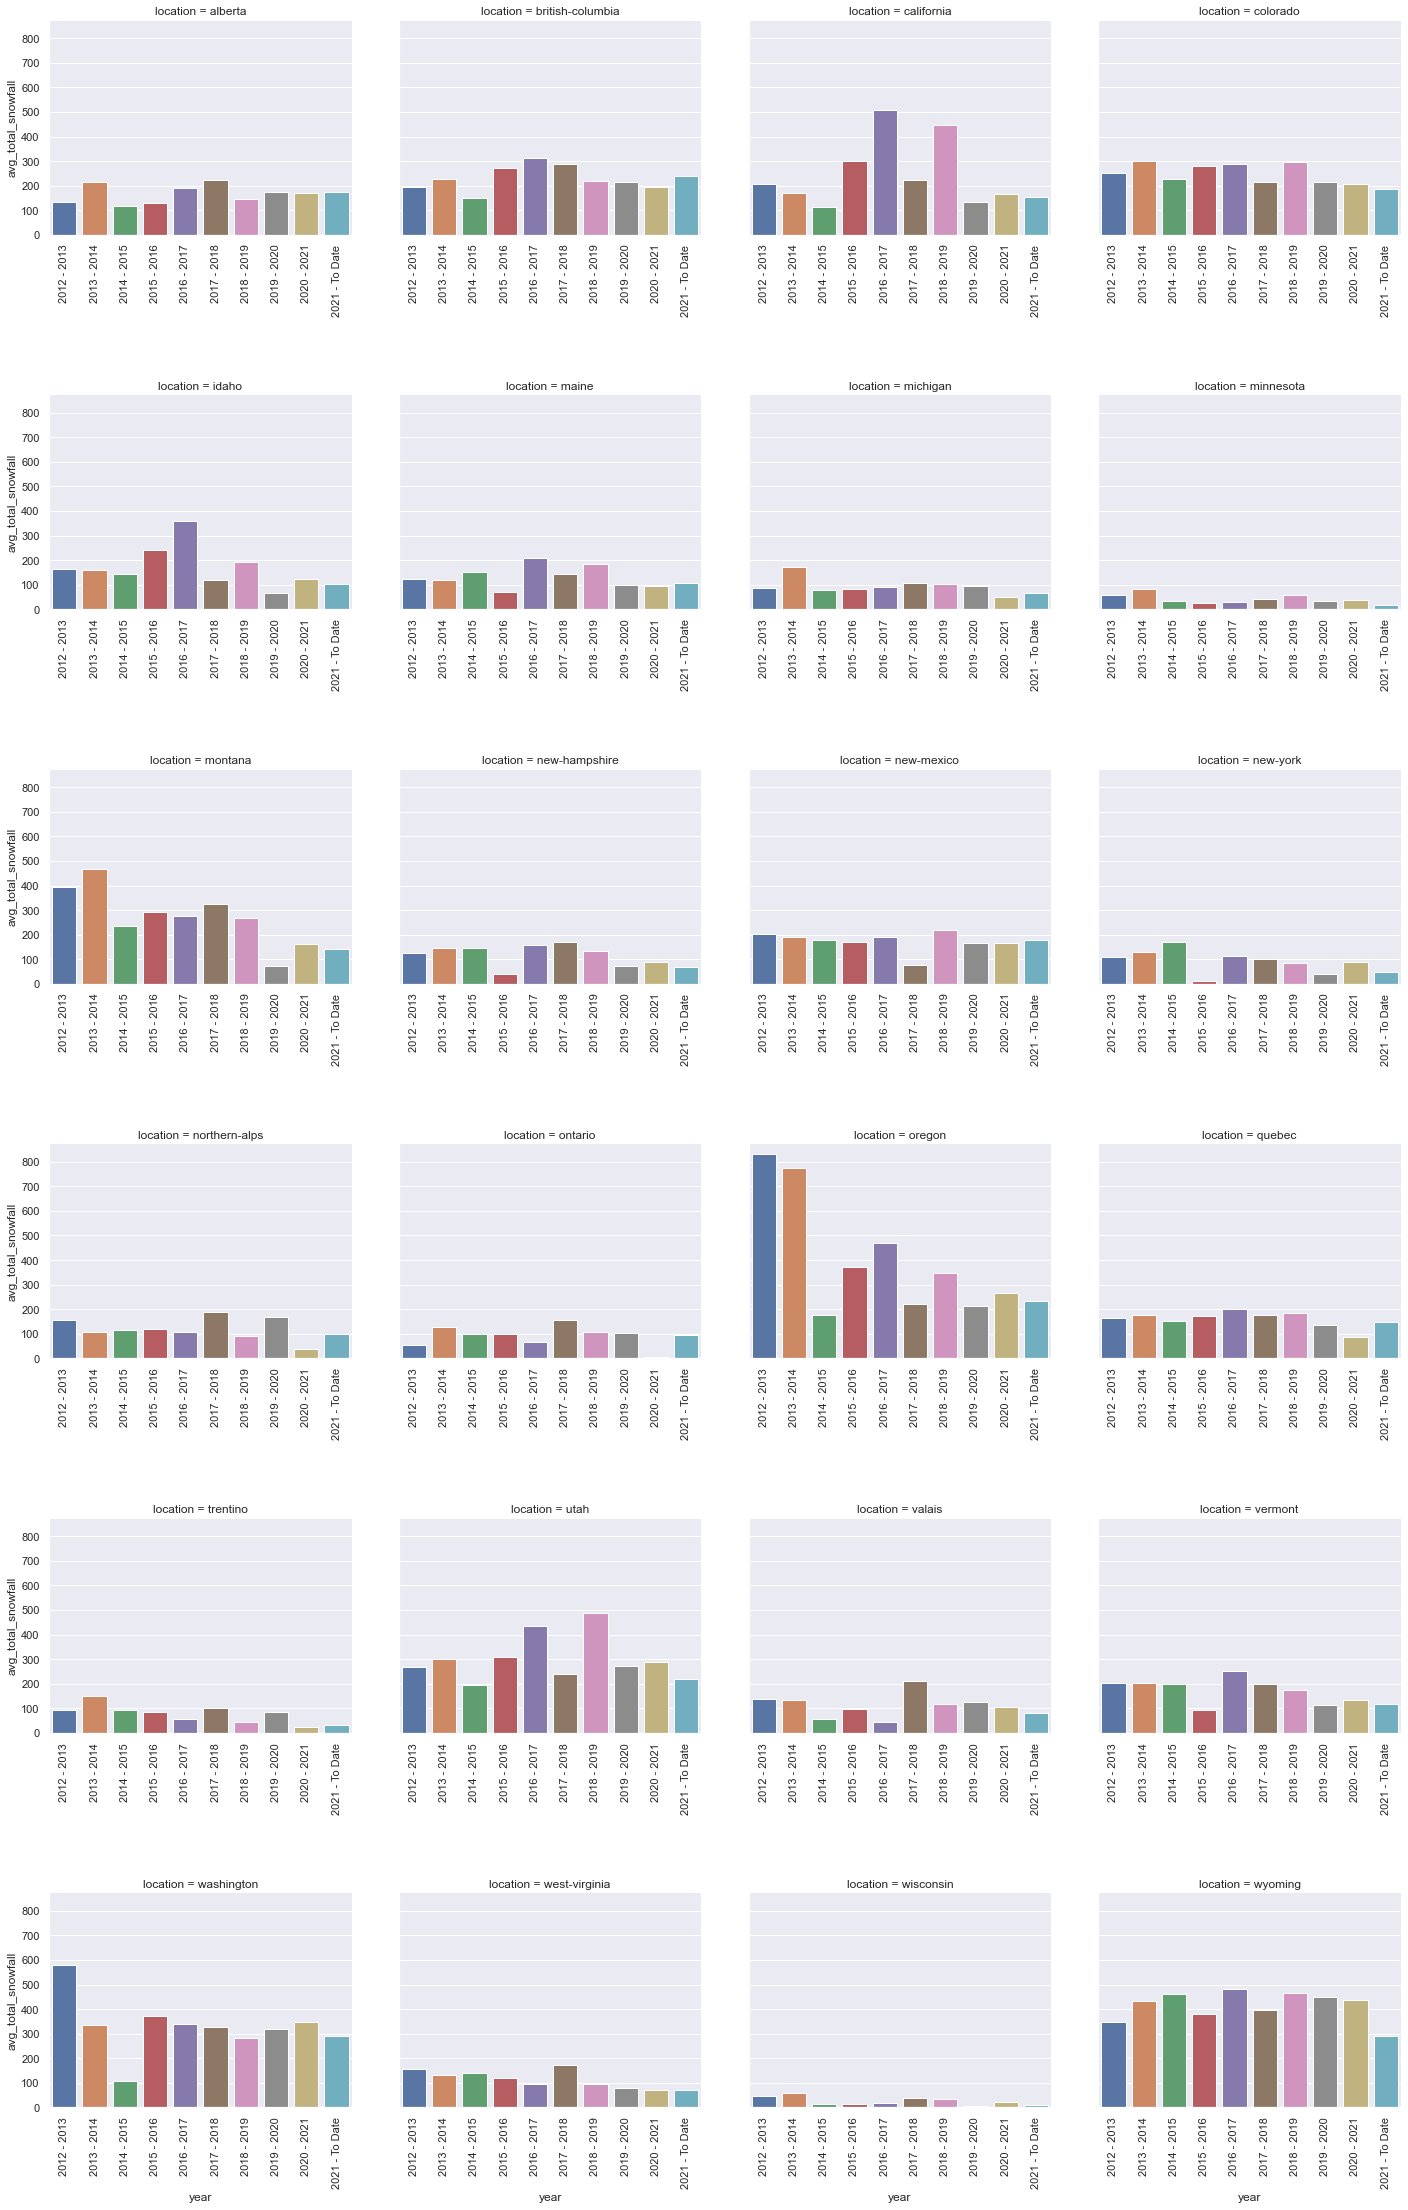

In [16]:
g = sns.catplot(data = query, x = 'year', y  = 'avg_total_snowfall',
										  col = 'location', kind = 'bar', col_wrap=4,
										  sharex= False, dodge = False)
for ax in g.axes:
	for label in ax.get_xticklabels():
		label.set_rotation(90)

g.figure.subplots_adjust(hspace=.75);

It looks like some locations may have a slight downward trend in their yearly average snowfall for all their resorts linked to either of these passes.

Let's look at the average snowfall metrics for the top 15 resorts in North America with the most terrain, and then create a visualization of all of the averages such that they can be easily compared: 

*The reason I'm filtering for the resorts with the top 15 highest amounts of terrain is because I typically only like to ski at resorts that a lot of terrain, so those are the ones I really care about.*

,continent,region,resort,pass,runs,terrain_ac,proj_days_open,avg_total_snowfall,avg_snowfall_days,avg_avg_base_depth,avg_avg_sum_depth,avg_max_base_depth,avg_biggest_snowfall
0,North America,british-columbia,Whistler Blackcomb,Epic,234,8171,185.0,330.0,82,44.2,58.7,102.6,22.3
1,North America,utah,Park City,Epic,341,7300,142.0,239.3,51,32.1,37.8,67.7,17.7
2,North America,california,Palisades Tahoe,Ikon,245,6000,196.0,362.4,46,32.2,60.9,94.3,32.2
3,North America,montana,Big Sky,Ikon,317,5800,143.0,263.6,67,28.8,44.7,82.9,14.2
4,North America,colorado,Aspen Snowmass,Ikon,336,5517,148.0,289.2,60,33.2,43.1,876.9,17.5
5,North America,colorado,Vail,Epic,267,5289,156.0,239.7,64,34.2,33.1,111.4,13.8
6,North America,california,Heavenly,Epic,97,4800,144.0,271.0,39,32.2,48.1,70.5,28.8
7,North America,oregon,Mt. Bachelor,Ikon,119,4323,177.0,391.0,70,56.1,73.0,112.7,22.7
8,North America,alberta,Lake Louise,Ikon,164,4200,NaN,212.1,79,35.1,49.2,66.0,16.7
9,North America,california,Mammoth,Ikon,150,3500,NaN,300.0,43,50.7,96.8,107.2,29.8


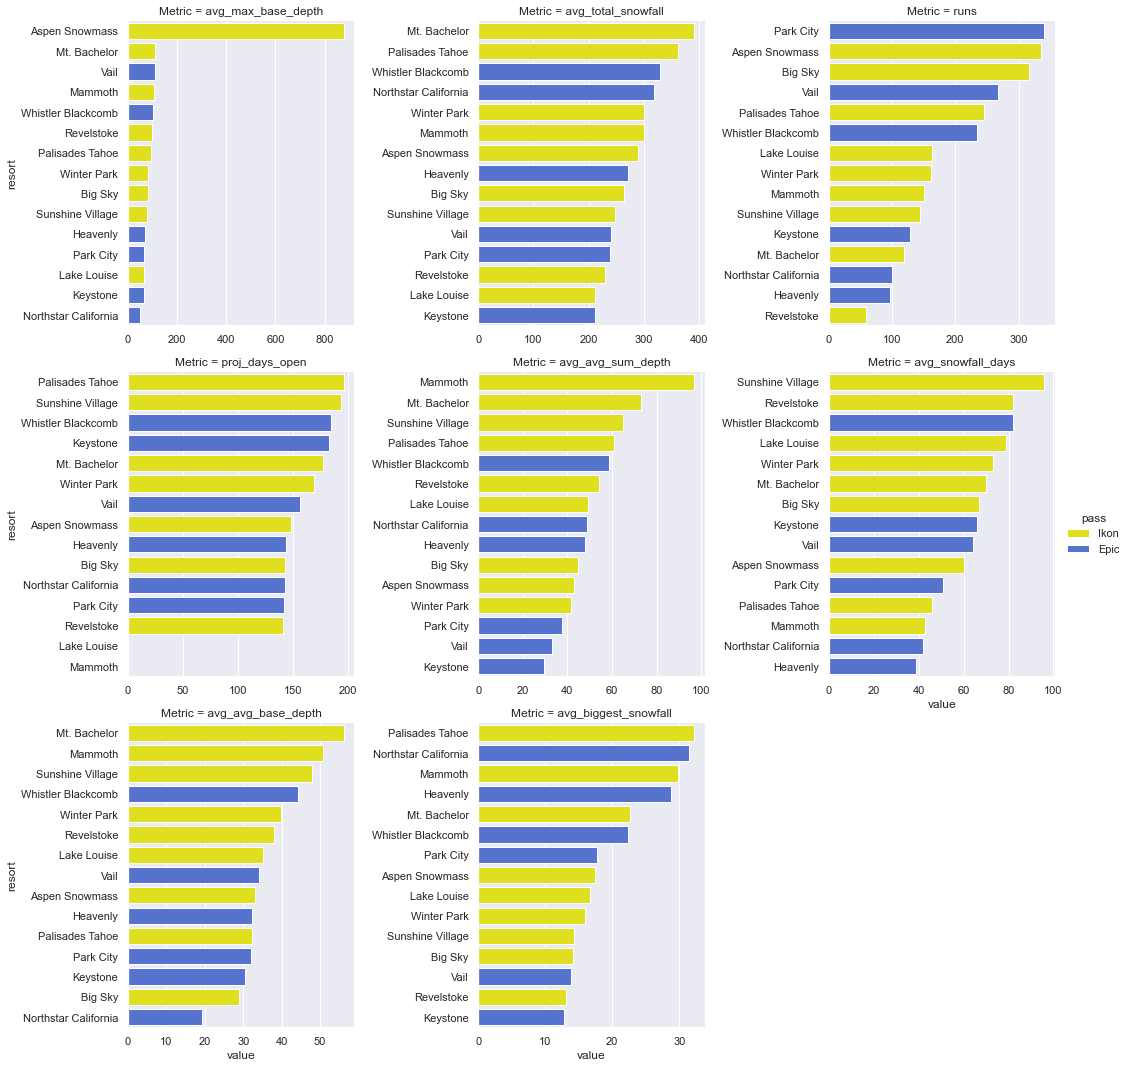

In [17]:
query = pd.read_sql_query('''
Select top 15
	s.continent,
	s.region,
	s.resort,
	s.pass,
	s.runs,
	s.terrain_ac,
	s.proj_days_open,
	avg(a.total_snowfall) as avg_total_snowfall,
	avg(a.snowfall_days) as avg_snowfall_days,
	avg(a.avg_base_dep) as avg_avg_base_depth,
	avg(a.avg_sum_dep) as avg_avg_sum_depth,
	avg(a.max_base_dep) as avg_max_base_depth,
	avg(a.biggest_snowfall) as avg_biggest_snowfall
From skiresorts2 s
		join
	 annualsnow a on s.resort = a.resort
Where continent = 'North America'
Group by s.Resort, s.pass, s.region, s.continent, s.pass, s.runs, s.terrain_ac, s.proj_days_open
order by terrain_ac desc;
''', conn)

display(query)


# Visualizing the output by plotting each numerical column:
value_cols = ['runs'] + list(query.columns[6:]) #variables to visualize
# Melting the dataframe to allow for plotting of every columns' data
melted = pd.melt(query, value_vars = value_cols, var_name = "Metric",
				 id_vars= ["resort", 'pass']) 

#plotting data
g = sns.catplot(data = melted.sort_values('value', ascending = False), x = 'value', y  = 'resort',
										  col = 'Metric', kind = 'bar', col_wrap=3,
										  sharex= False, sharey= False, hue = 'pass', 
										  palette = colors, dodge = False)

Is are any of the variables in the last query correlated? We'll use the entire dataset this time instead of just the top 15 resorts by terrain:

,continent,region,resort,pass,runs,terrain_ac,proj_days_open,avg_total_snowfall,avg_snowfall_days,avg_avg_base_depth,avg_avg_sum_depth,avg_max_base_depth,avg_biggest_snowfall
0,North America,british-columbia,Whistler Blackcomb,Epic,234.0,8171,185.0,330.0,82,44.2,58.7,102.6,22.3
1,North America,utah,Park City,Epic,341.0,7300,142.0,239.3,51,32.1,37.8,67.7,17.7
2,North America,california,Palisades Tahoe,Ikon,245.0,6000,196.0,362.4,46,32.2,60.9,94.3,32.2
3,North America,montana,Big Sky,Ikon,317.0,5800,143.0,263.6,67,28.8,44.7,82.9,14.2
4,North America,colorado,Aspen Snowmass,Ikon,336.0,5517,148.0,289.2,60,33.2,43.1,876.9,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,North America,new-hampshire,Mount Sunapee,Epic,66.0,232,130.0,93.7,24,13.2,19.0,28.3,13.0
63,North America,california,Bear Mountain,Ikon,15.0,198,135.0,88.7,13,16.9,24.2,37.6,16.6
64,North America,alberta,Mt. Norquay,Ikon,60.0,190,163.0,101.5,62,17.9,25.0,39.2,9.0
65,North America,wisconsin,Wilmot Mountain,Epic,21.0,135,139.0,25.6,10,11.4,21.0,53.0,6.5


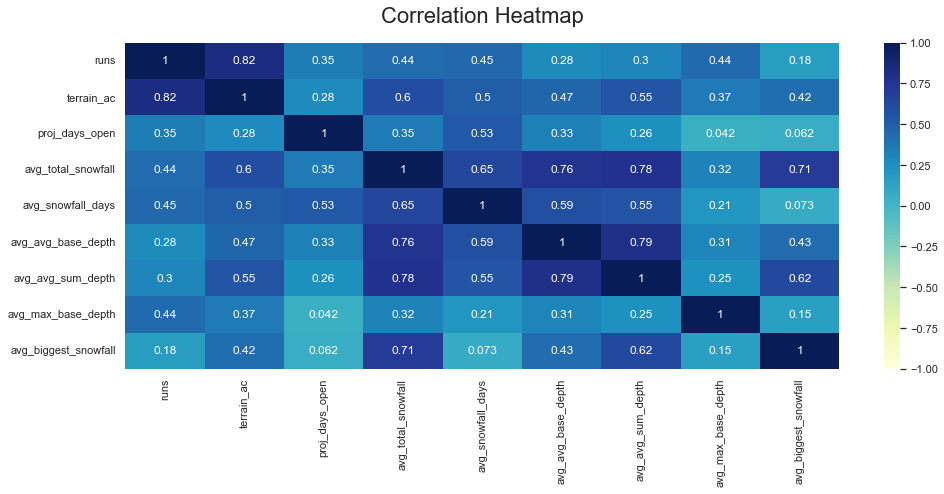

In [18]:
query = pd.read_sql_query('''
Select
	s.continent,
	s.region,
	s.resort,
	s.pass,
	s.runs,
	s.terrain_ac,
	s.proj_days_open,
	avg(a.total_snowfall) as avg_total_snowfall,
	avg(a.snowfall_days) as avg_snowfall_days,
	avg(a.avg_base_dep) as avg_avg_base_depth,
	avg(a.avg_sum_dep) as avg_avg_sum_depth,
	avg(a.max_base_dep) as avg_max_base_depth,
	avg(a.biggest_snowfall) as avg_biggest_snowfall
From skiresorts2 s
		join
	 annualsnow a on s.resort = a.resort
Where continent = 'North America'
Group by s.Resort, s.pass, s.region, s.continent, s.pass, s.runs, s.terrain_ac, s.proj_days_open
order by terrain_ac desc;
''', conn)

display(query)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(query.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':22}, pad=20);

Last thing concerning terrain, what does the difficulty of the terrain look like (indicated by the labeling of the runs) in those resorts with at least 3000 acres? I care about difficult terrain, so I'll put those at the top:

In [19]:
query = pd.read_sql_query('''
Select 
	region,
	resort,
	pass,
	terrain_ac,
	green_runs,
	blue_runs,
	black_runs,
	double_blacks
From
	skiresorts2
Where terrain_ac > 3000
Order by black_runs desc, double_blacks desc;
''', conn)

display(query)



,region,resort,pass,terrain_ac,green_runs,blue_runs,black_runs,double_blacks
0,colorado,Winter Park,Ikon,3081,0.24,0.22,0.50,0.04
1,alberta,Sunshine Village,Ikon,3358,0.18,0.26,0.48,0.08
2,montana,Big Sky,Ikon,5800,0.15,0.25,0.42,0.18
3,colorado,Vail,Epic,5289,0.22,0.34,0.41,0.02
4,colorado,Keystone,Epic,3148,0.16,0.43,0.41,NaN
5,british-columbia,Whistler Blackcomb,Epic,8171,0.18,0.40,0.35,0.07
6,utah,Park City,Epic,7300,0.08,0.41,0.28,0.23
7,california,Northstar California,Epic,3170,0.13,0.60,0.27,NaN
8,california,Heavenly,Epic,4800,0.08,0.62,0.25,0.05
9,california,Mammoth,Ikon,3500,0.15,0.48,0.24,0.13


That leads to a question, of the two passes, in North America, what percent of the total runs for all resorts are of each type of difficulty? Since we don't have data for the runs for a lot of resorts, lets only do resorts that at least have green and blue runs recorded.

In [20]:
query = pd.read_sql_query('''
Select
	a.pass,
	b.num_of_resorts,
	round(sum(a.green_runs) / b.num_of_resorts, 4) * 100 as perc_green_runs,
	round(sum(a.blue_runs) / b.num_of_resorts, 4) * 100 as perc_blue_runs,
	round(sum(a.black_runs) / b.num_of_resorts, 4) * 100 as perc_black_runs,
	round(sum(a.double_blacks) / b.num_of_resorts, 4) * 100 as perc_dbl_black_runs
From
	skiresorts2 a
		Join
	(Select
		 pass,
		 count(resort) as num_of_resorts
	 From
		 skiresorts2
	 Where continent = 'North America' and green_runs is not null and blue_runs is not null
	 Group by pass) b on a.pass = b.pass
Where continent = 'North America' and green_runs is not null and blue_runs is not null
Group by a.pass, b.num_of_resorts;
''', conn)

display(query)

,pass,num_of_resorts,perc_green_runs,perc_blue_runs,perc_black_runs,perc_dbl_black_runs
0,Epic,21,19.14,41.24,27.76,11.90
1,Ikon,30,19.73,34.30,31.30,14.53


What is the average amount of snowfall for a season for all the resorts and all seasons? And how many seasons for both the Epic and Ikon pass's resorts have exceeded that average?

In [21]:
query = pd.read_sql_query('''
Declare @pop_average float;
Set @pop_average = (Select 
						Avg(total_snowfall) as pop_average
					From annualsnow);
Select
	a.pass,
	Count(a.pass) as seasons_w_above_avg_snowfall
From
	annualsnow a
Where a.total_snowfall > @pop_average
Group by a.pass;
''', conn)

display(query)

,pass,seasons_w_above_avg_snowfall
0,Epic,150
1,Ikon,228


What about if we filter the data such that only North American resorts are included?

In [22]:
query = pd.read_sql_query('''
Declare @pop_average float;
Set @pop_average = (Select 
						Avg(total_snowfall) as pop_average
					From annualsnow);
Select
	a.pass,
	Count(a.pass) as seasons_w_above_avg_snowfall
From
	annualsnow a
		Join
	skiresorts2 s on a.resort = s.resort
Where total_snowfall > @pop_average and continent = 'North America'
Group by a.pass;
''', conn)

display(query)

,pass,seasons_w_above_avg_snowfall
0,Epic,140
1,Ikon,240


For some reason, joining the tables results in more rows than there should be. Let's figure out which resorts are being counted more than once.

In [23]:
query = pd.read_sql_query('''
select
	a.resort,
	count(a.Resort) as num_of_resorts
From annualsnow a
		join
	 skiresorts2 s on a.Resort = s.resort
Group by a.resort
Order by num_of_resorts desc;
''', conn)

display(query)

,resort,num_of_resorts
0,Sun Valley,40
1,Snowbasin,40
2,Snowbird,10
3,Snowshoe,10
4,Solitude,10
...,...,...
80,Pejo,10
81,Pinzolo,10
82,Pontedilegno - Tonale,10
83,Revelstoke,10


Because Sun Valley and Snowbasin are listed with the Epic pass and the Ikon pass (they have deals with both) they are being joined twice. That can be fixed by just joining a table that is only distinct values.

In [24]:
query = pd.read_sql_query('''
Declare @pop_average float;
Set @pop_average = (Select 
						Avg(total_snowfall) as pop_average
					From annualsnow);

With distinctresorts(continent, resort) As
	(Select
		continent,
		resort
	From skiresorts2
	group by resort, continent)

Select
	s.continent,
	a.pass,
	Count(a.pass) as seasons_w_above_avg_snowfall
From
	annualsnow a
		Join
	distinctresorts s on a.resort = s.resort
Where total_snowfall > @pop_average and continent = 'North America'
Group by a.pass, s.continent;
''', conn)

display(query)


,continent,pass,seasons_w_above_avg_snowfall
0,North America,Epic,128
1,North America,Ikon,228


Given that there are 26 Epic resorts and 41 Ikon resorts in this dataset, then therefore it makes sense that there would be a little less than twice as many seasons with above average snowfall for Ikon when compared to Epic.

For our last query, we'll find the average total snowfall in a season for all North American Resorts, then find what percentage of the all of the Epic and Ikon's respective total number of seasons had total snowfall above that average, and filter those results such that we can see what percentage of those seasons were given to unlimited and limited.

In [25]:
query = pd.read_sql_query('''
Declare @pop_average float;
Set @pop_average = (Select 
						Avg(total_snowfall) as pop_average
					From annualsnow
					Where resort in (Select
									     resort
									 from skiresorts2
									 Where continent = 'North America'));

With distinctresorts(continent, resort, limited_or_unlimited) As
	(Select
		continent,
		resort,
		limited_or_unlimited
	From skiresorts2
	group by resort, continent, limited_or_unlimited),

	total_seasons(pass, total_seasons) As
	(Select 
		pass,
		count(total_snowfall)
	 From annualsnow
	 Where resort in (Select
						resort
					  from skiresorts2
				      Where continent = 'North America')
	 Group by pass)

Select
	s.continent,
	a.pass,
	s.limited_or_unlimited,
	Count(a.pass) as num_of_seasons_w_above_avg_snowfall,
	t.total_seasons as total_seasons_for_pass,
	round((cast(count(a.pass) as float) / t.total_seasons) * 100, 2) as percent_of_total_seasons_for_pass,
	round(@pop_average, 2) as average_snowfall_in_north_american_resorts
From
	annualsnow a
		Join
	distinctresorts s on a.resort = s.resort
		Join
	total_seasons t on a.Pass = t.pass
Where a.total_snowfall > @pop_average and continent = 'North America'
Group by a.pass, s.limited_or_unlimited, continent, t.total_seasons
order by a.pass, s.limited_or_unlimited;

''', conn)

display(query)

,continent,pass,limited_or_unlimited,num_of_seasons_w_above_avg_snowfall,total_seasons_for_pass,percent_of_total_seasons_for_pass,average_snowfall_in_north_american_resorts
0,North America,Epic,limited,22,260,8.46,214.61
1,North America,Epic,unlimited,76,260,29.23,214.61
2,North America,Ikon,limited,128,410,31.22,214.61
3,North America,Ikon,unlimited,56,410,13.66,214.61


Looks like even though Ikon has a lot more seasons where the snowfall is greater than the average for the entire set, Epic's unlimited resorts offer more snow in an average season than Ikon's unlimited resorts (for this dataset at least).

### 5. Tableau and Final Thoughts

My goal with this project was to showcase some of my [Python scraping](scrapingurl) and visualization skills, my SQL knowledge, and my [Tableau skills](https://public.tableau.com/app/profile/grayson.hineline) in one project. In this notebook, I queried the data that I scraped from Onthesnow.com using SQL Server, and created some basic visualizations of the results. The queries ran here were meant to answer some general questions about aggregate differences in the resorts and the passes, so I am not going to state any broad conclusions here.

After querying the data, I went into Tableau and made a couple interactive dashboards such that one can run some self-visualizing queries of their own to answer questions they might have about the resorts. Please checkout my Tableau dashboards [here](https://public.tableau.com/app/profile/grayson.hineline).

Thanks for checking out my notebook!
